<a href="https://colab.research.google.com/github/Noel1805/Inteligencia_Artificial/blob/main/Arbol_desici%C3%B3n_diabete_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción al Análisis de Diabetes con Árboles de Decisión

Este cuaderno tiene como objetivo predecir la presencia de diabetes utilizando un conjunto de datos que contiene varias métricas de salud. Se empleará un modelo de Árbol de Decisión para clasificar a los pacientes, lo que permitirá identificar las características más influyentes en el diagnóstico de la enfermedad.

/tmp/ipython-input-2225955135.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(df[columna].median(), inplace=True)


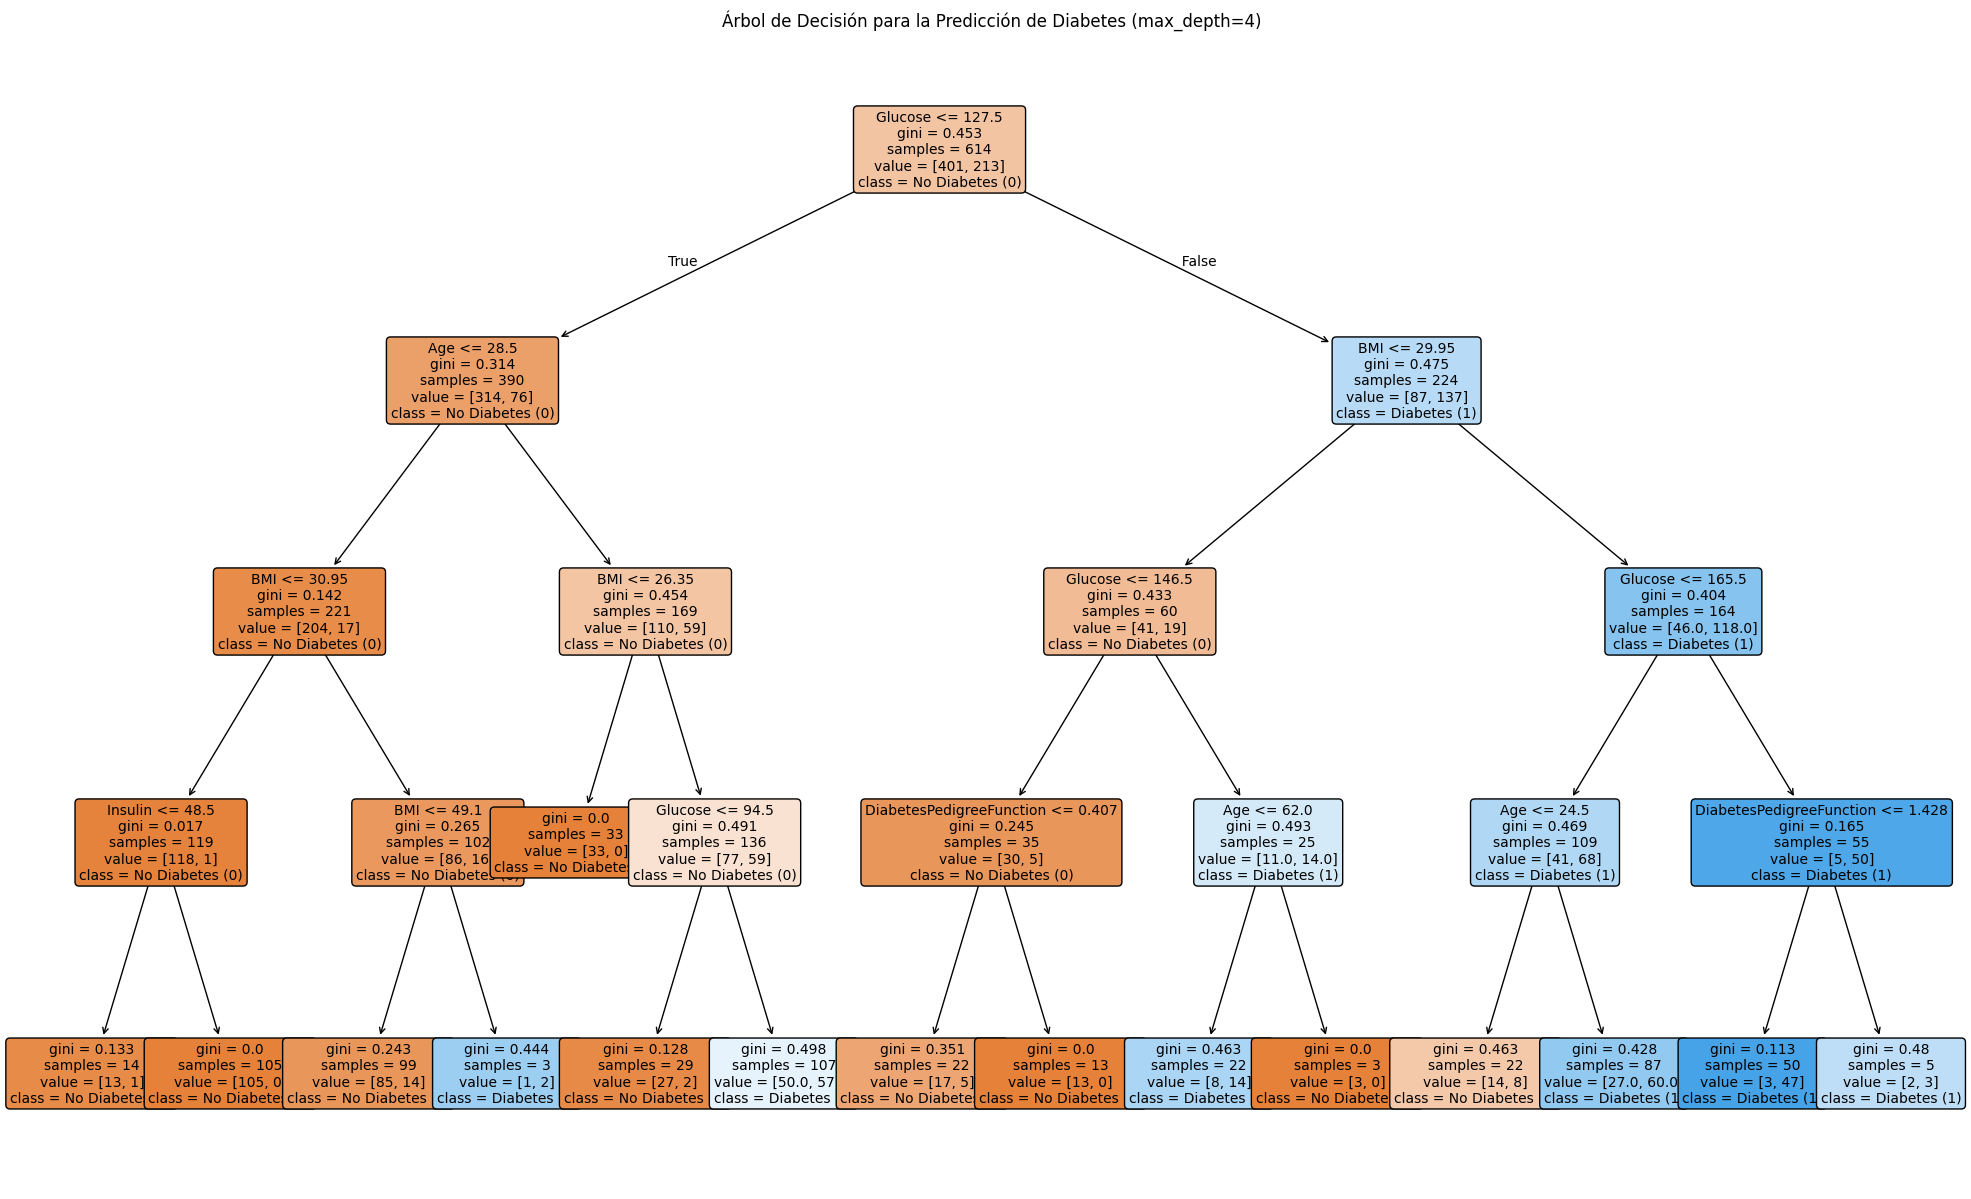

El valor AUC para el Árbol de Decisión (Dataset Diabetes) es: 0.807


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("diabetes.csv")


columnas_a_imputar = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


df[columnas_a_imputar] = df[columnas_a_imputar].replace(0, np.nan)

for columna in columnas_a_imputar:
    df[columna].fillna(df[columna].median(), inplace=True)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(25, 15))
plot_tree(
    dt_model,
    filled=True,
    rounded=True,
    feature_names=X.columns.tolist(),
    class_names=['No Diabetes (0)', 'Diabetes (1)'],
    fontsize=10
)
plt.title("Árbol de Decisión para la Predicción de Diabetes (max_depth=4)")
plt.show()

print(f"El valor AUC para el Árbol de Decisión (Dataset Diabetes) es: {auc_dt:.3f}")

# Interpretación del Árbol Visual
El diagrama generado muestra las reglas que el modelo utiliza para clasificar a los pacientes.


Primer Nodo (Raíz): La variable utilizada en este nodo (casi siempre Glucose) es la más importante de todas, ya que logra la mayor separación inicial entre las clases.

Nodos Secundarios: Las variables utilizadas en los siguientes niveles (como BMI y Age) son las siguientes en importancia, ya que refinan la clasificación dentro de los subgrupos.



## Resumen de lo Realizado

1.  **Carga y Preprocesamiento de Datos**: Se cargó el conjunto de datos `diabetes.csv`. Los valores `0` en columnas como `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` y `BMI` fueron tratados como valores `NaN` y posteriormente imputados con la mediana de cada columna.
2.  **División del Conjunto de Datos**: Los datos fueron divididos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.
3.  **Entrenamiento del Modelo**: Se entrenó un modelo `DecisionTreeClassifier` con una profundidad máxima (`max_depth`) de 4 y otro sin restricciones de profundidad para el cálculo de la importancia de las características.
4.  **Evaluación del Modelo**: Se calculó el AUC (Área bajo la curva ROC) para evaluar la capacidad predictiva del modelo de árbol de decisión.
5.  **Visualización del Árbol**: Se generó una visualización del árbol de decisión para interpretar sus reglas de clasificación.
6.  **Análisis de Importancia de Características**: Se calculó y visualizó la importancia de cada característica para entender cuáles son los factores más relevantes en la predicción de la diabetes.

/tmp/ipython-input-2831867267.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(df[columna].median(), inplace=True)


--- Importancia de las Características (Árbol de Decisión - Diabetes) ---
             Característica  Importancia (Gini)
0               Pregnancies            0.027960
3             SkinThickness            0.035927
2             BloodPressure            0.079928
4                   Insulin            0.087381
6  DiabetesPedigreeFunction            0.115416
7                       Age            0.131524
5                       BMI            0.164377
1                   Glucose            0.357487


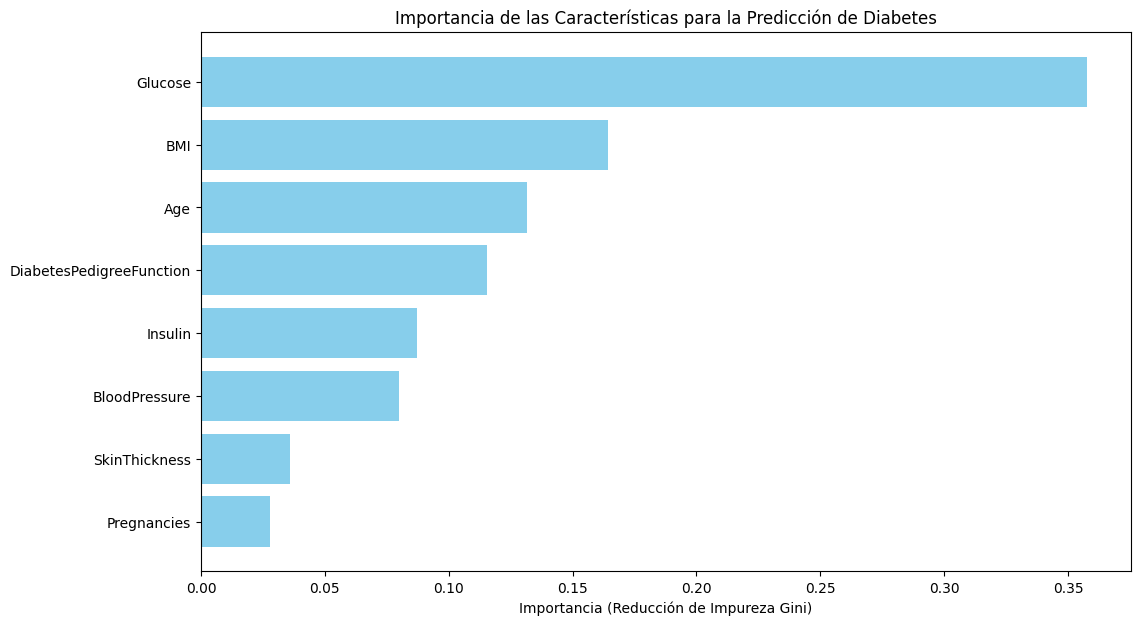

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("diabetes.csv")

columnas_a_imputar = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[columnas_a_imputar] = df[columnas_a_imputar].replace(0, np.nan)

for columna in columnas_a_imputar:
    df[columna].fillna(df[columna].median(), inplace=True)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

importances = dt_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia (Gini)': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importancia (Gini)', ascending=True)

print("--- Importancia de las Características (Árbol de Decisión - Diabetes) ---")
print(feature_importance_df)

plt.figure(figsize=(12, 7))
plt.barh(feature_importance_df['Característica'], feature_importance_df['Importancia (Gini)'], color='skyblue')
plt.xlabel("Importancia (Reducción de Impureza Gini)")
plt.title("Importancia de las Características para la Predicción de Diabetes")
plt.show()

## Conclusión

El análisis del conjunto de datos de diabetes mediante un árbol de decisión ha revelado información clave sobre los factores predictivos de la enfermedad:

*   **Glucosa** se ha identificado como la característica más influyente en la predicción de la diabetes, lo que subraya su importancia clínica.
*   Otras características como **BMI (Índice de Masa Corporal)** y **Age (Edad)** también juegan un papel significativo en el modelo.
*   El modelo de Árbol de Decisión obtuvo un valor **AUC de 0.807**, indicando una buena capacidad para distinguir entre pacientes con y sin diabetes.

Este modelo proporciona una herramienta interpretable para entender los criterios de diagnóstico de la diabetes, destacando la importancia de mantener niveles adecuados de glucosa, un BMI saludable y considerar la edad como factores de riesgo.